In [103]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib
from sklearn.model_selection import cross_val_score

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [77]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩

x_train = pd.read_csv('train_x.csv')
y_train = pd.read_csv('train_y.csv')
x_test = pd.read_csv('test_x.csv')
y_test = pd.read_csv('test_y.csv')

In [79]:
x_test.drop('Unnamed: 0', axis=1, inplace=True)
x_train.drop('Unnamed: 0', axis=1, inplace=True)
y_test.drop('Unnamed: 0', axis=1, inplace=True)
y_train.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
x_train.corr()

,PM10,PM25,기온(°C),풍향(16방위),습도(%),증기압(hPa),일조(hr),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),10cm 지중온도(°C),month,PM10_lag1
PM10,1.000000,0.675537,-0.125976,0.100598,-0.062728,-0.203516,0.031409,-0.099248,-0.086809,-0.354747,-0.138677,-0.184603,-0.167232,0.311748
PM25,0.675537,1.000000,-0.175209,0.088466,0.000087,-0.226776,-0.025579,-0.046220,-0.076331,-0.515618,-0.223101,-0.285055,-0.124318,0.255371
기온(°C),-0.125976,-0.175209,1.000000,-0.181722,0.145338,0.881618,0.093765,0.307818,0.153545,0.068274,0.946661,0.938482,0.218436,-0.144524
풍향(16방위),0.100598,0.088466,-0.181722,1.000000,-0.200931,-0.189205,0.079040,-0.177082,-0.095189,0.025609,-0.138436,-0.153320,-0.041551,0.099027
습도(%),-0.062728,0.000087,0.145338,-0.200931,1.000000,0.450806,-0.513351,0.362110,0.379947,-0.501741,0.055299,0.248468,0.195309,-0.135636
증기압(hPa),-0.203516,-0.226776,0.881618,-0.189205,0.450806,1.000000,-0.107032,0.357037,0.239898,-0.038121,0.830627,0.915059,0.251851,-0.225251
일조(hr),0.031409,-0.025579,0.093765,0.079040,-0.513351,-0.107032,1.000000,-0.400436,-0.367237,0.222798,0.262351,-0.029603,-0.037107,0.044928
전운량(10분위),-0.099248,-0.046220,0.307818,-0.177082,0.362110,0.357037,-0.400436,1.000000,0.748671,-0.240803,0.248438,0.265382,0.012034,-0.095953
중하층운량(10분위),-0.086809,-0.076331,0.153545,-0.095189,0.379947,0.239898,-0.367237,0.748671,1.000000,-0.271169,0.115374,0.133205,0.006990,-0.078384
시정(10m),-0.354747,-0.515618,0.068274,0.025609,-0.501741,-0.038121,0.222798,-0.240803,-0.271169,1.000000,0.110660,0.092940,0.062339,-0.120017


In [81]:
y_train

,PM10_1
0,25.0
1,27.0
2,23.0
3,24.0
4,26.0
...,...
8755,27.0
8756,20.0
8757,20.0
8758,20.0


#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [82]:
# LinearRegression 코드를 작성하세요.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [83]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(x_test)

In [84]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print(mse(y_test, y_pred_LR), round(r2_score(y_test, y_pred_LR), 5))

38.34323550007481 0.93085


In [6]:
# 학습한 모델을 pkl 파일로 저장해보세요.




# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [85]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model_rf = RFR(random_state=1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

C:\Users\user\AppData\Local\Temp\ipykernel_2608\2243390173.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


In [86]:
# Test 데이터로 성능을 평가해보세요.
print(mse(y_test, y_pred_rf), r2_score(y_test, y_pred_rf))

43.15209356481481 0.9221730527478912


In [9]:
# 학습한 모델을 파일로 저장해보세요.



In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

arr = model_rf.feature_importances_
arr

array([9.43929791e-01, 2.33846990e-02, 1.94256803e-03, 1.71223733e-03,
       3.94841737e-03, 3.02180796e-03, 7.40263727e-04, 1.17806187e-03,
       3.39527111e-03, 6.61430391e-03, 1.84545352e-03, 4.51036789e-03,
       5.23874287e-04, 3.25288316e-03])

<BarContainer object of 14 artists>

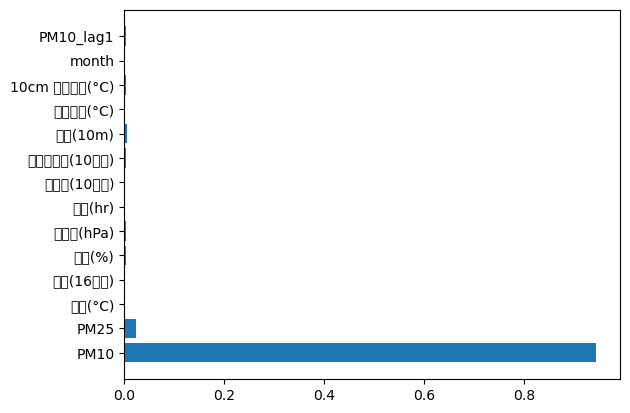

In [95]:
#-*- encoding: utf-8 -*-
plt.barh(y = x_train.columns, width = model_rf.feature_importances_)

In [11]:
# (선택) 확인
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [96]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

model = GBR(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
# Test 데이터로 성능을 평가해보세요.

print(mse(y_test, y_pred)**(1/2), round(r2_score(y_test, y_pred),5))

6.147498668263723 0.93184


In [14]:
# 학습한 모델을 파일로 저장해보세요.




C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\

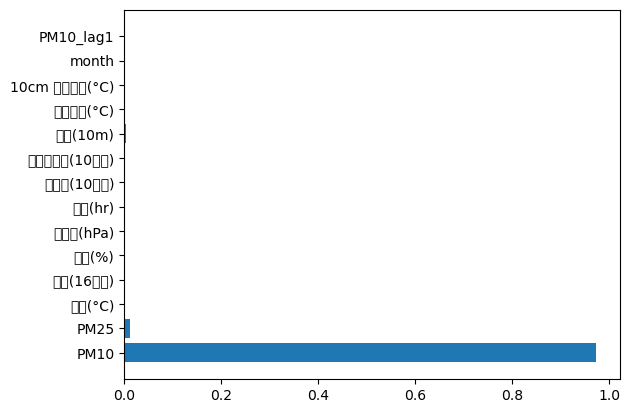

In [98]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

plt.barh(y=list(x_train), width=model.feature_importances_)
plt.show()

In [16]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [99]:
import warnings
from lightgbm import LGBMRegressor

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [120]:
x_train.drop('month', axis=1, inplace=True)
x_test.drop('month', axis=1, inplace=True)

In [121]:
# 선언하기
model = LGBMRegressor(random_state=1, verbose=0)

In [122]:
# 성능예측
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.


LGBMRegressor(random_state=1, verbose=0)

In [123]:
# 학습한 모델을 파일로 저장해보세요.
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mse(y_test, y_pred))

0.9294424591829075
39.12148311791737


In [124]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

model.feature_importances_

array([873, 301, 155, 122, 241, 171,  71,  74,  65, 332, 154, 204, 237])

In [126]:
x_train.corr()

,PM10,PM25,기온(°C),풍향(16방위),습도(%),증기압(hPa),일조(hr),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),10cm 지중온도(°C),PM10_lag1
PM10,1.000000,0.675537,-0.125976,0.100598,-0.062728,-0.203516,0.031409,-0.099248,-0.086809,-0.354747,-0.138677,-0.184603,0.311748
PM25,0.675537,1.000000,-0.175209,0.088466,0.000087,-0.226776,-0.025579,-0.046220,-0.076331,-0.515618,-0.223101,-0.285055,0.255371
기온(°C),-0.125976,-0.175209,1.000000,-0.181722,0.145338,0.881618,0.093765,0.307818,0.153545,0.068274,0.946661,0.938482,-0.144524
풍향(16방위),0.100598,0.088466,-0.181722,1.000000,-0.200931,-0.189205,0.079040,-0.177082,-0.095189,0.025609,-0.138436,-0.153320,0.099027
습도(%),-0.062728,0.000087,0.145338,-0.200931,1.000000,0.450806,-0.513351,0.362110,0.379947,-0.501741,0.055299,0.248468,-0.135636
증기압(hPa),-0.203516,-0.226776,0.881618,-0.189205,0.450806,1.000000,-0.107032,0.357037,0.239898,-0.038121,0.830627,0.915059,-0.225251
일조(hr),0.031409,-0.025579,0.093765,0.079040,-0.513351,-0.107032,1.000000,-0.400436,-0.367237,0.222798,0.262351,-0.029603,0.044928
전운량(10분위),-0.099248,-0.046220,0.307818,-0.177082,0.362110,0.357037,-0.400436,1.000000,0.748671,-0.240803,0.248438,0.265382,-0.095953
중하층운량(10분위),-0.086809,-0.076331,0.153545,-0.095189,0.379947,0.239898,-0.367237,0.748671,1.000000,-0.271169,0.115374,0.133205,-0.078384
시정(10m),-0.354747,-0.515618,0.068274,0.025609,-0.501741,-0.038121,0.222798,-0.240803,-0.271169,1.000000,0.110660,0.092940,-0.120017


In [125]:
list(x_train)

['PM10',
 'PM25',
 '기온(°C)',
 '풍향(16방위)',
 '습도(%)',
 '증기압(hPa)',
 '일조(hr)',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '시정(10m)',
 '지면온도(°C)',
 '10cm 지중온도(°C)',
 'PM10_lag1']

In [21]:
# Feature의 중요도 확인





In [22]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [134]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [139]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.model_selection import GridSearchCV
# LGB                        
param_lgb = {"learning_rate" : [0.2,0.3],
             "max_depth" : [10, 20, 30],
             "num_leaves" : [100,300],
             "n_estimators" : [100, 200, 300],
             'random_state':1,
            }
gscv_lgb = GridSearchCV (estimator = LGBMRegressor(random_state=1), param_grid = param_lgb, scoring ='r2', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_lgb.fit(x_train, y_train)

TypeError: Parameter grid for parameter 'random_state' needs to be a list or a numpy array, but got 1 (of type int) instead. Single values need to be wrapped in a list with one element.

In [137]:
gscv_lgb.best_estimator_

LGBMRegressor(learning_rate=0.3, max_depth=20, n_estimators=200, num_leaves=100)

In [138]:
y_pred = gscv_lgb.predict(x_test)

print(r2_score(y_test, y_pred))

0.9129929617884552
